# **ABOUT THE PROJECT**

This Machine Learning Project tries to predict and diagnose Diabetes using Logistic Regression Algorithm. Logistic Regression is an ML algorithm especially used for Binary classification. It uses sigmoid function and classifies the data points using an 'S' type curve. Logistic Regression is especailly used when the Target variable is categorical. Some use cases of Logistic Regression are: Fraud detection, spam email detection, and especially for those problems statements which have output in the form of 'yes' or 'No'/ 1 or 0 etc.



The Dataset which was used is: [PIMA DATASET KAGGLE](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

## **Imporing important libraries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


###**Loading the Dataset**

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

### **Collection of Data**

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Checking if theare any null values in the dataset or not. Null values affect the performance of the model
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Since there are no Null values present in the dataset, no need for data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

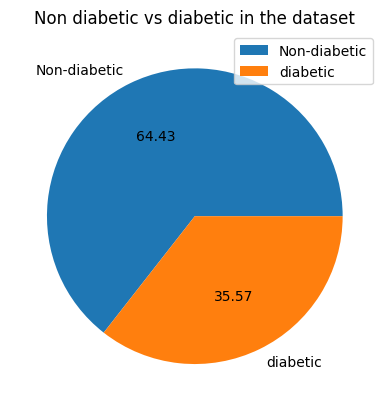

In [ ]:
x = [500, 276]
y = ['Non-diabetic', 'diabetic']
plt.pie(x, labels = y, autopct ="%0.2f")
plt.title("Non diabetic vs diabetic in the dataset")
plt.legend()
plt.show()

### **Removal Of Outliers**

Detection and removal of outliers is an importnat step in any machine learning pipline. Outliers affect the performance and predictions of a ML model.

In [ ]:
#Detection of Outliers using Z-scores
from scipy import stats
z = np.abs(stats.zscore(df))

In [ ]:
print(z)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270  0.692891  0.204013   
1       0.844885  1.123396       0.160546       0.530902  0.692891  0.684422   
2       1.233880  1.943724       0.263941       1.288212  0.692891  1.103255   
3       0.844885  0.998208       0.160546       0.154533  0.123302  0.494043   
4       1.141852  0.504055       1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813  0.622642       0.356432       1.722735  0.870031  0.115169   
764     0.547919  0.034598       0.046245       0.405445  0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594  0.735190   
766     0.844885  0.159787       0.470732       1.288212  0.692891  0.240205   
767     0.844885  0.873019       0.046245       0.656358  0.692891  0.202129   

     DiabetesPedigreeFunction       Age

In [ ]:
threshold = 3
print(np.where(z>3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753]), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4]))


Visualising and analysing Outliers using Z-scores

In [ ]:
df = df[(z<3).all(axis=1)]

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


All the outliers have been removed, Dataset have been cleaned properly

In [ ]:
diab = df.loc[df['Outcome']==1]
nodiab = df.loc[df['Outcome']==0]

In [ ]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.0
mean,4.903084,140.744493,75.546256,22.030837,86.629956,35.018502,0.541211,37.105727,1.0
std,3.492006,29.850748,12.046052,16.718225,102.588121,6.212990,0.321065,10.677381,0.0
min,0.000000,78.000000,30.000000,0.000000,0.000000,22.900000,0.088000,21.000000,1.0
25%,2.000000,116.500000,68.000000,0.000000,0.000000,30.900000,0.271000,29.000000,1.0
50%,5.000000,138.000000,76.000000,27.000000,0.000000,34.200000,0.452000,36.000000,1.0
75%,8.000000,164.000000,84.000000,35.500000,162.500000,38.100000,0.731500,44.000000,1.0
max,13.000000,199.000000,114.000000,56.000000,392.000000,55.000000,1.394000,67.000000,1.0


In [ ]:
nodiab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.0
mean,3.325380,110.223427,70.770065,20.175705,65.553145,30.825813,0.411885,31.119306,0.0
std,3.040735,24.471278,12.148504,14.696404,82.513055,6.375841,0.254421,11.291247,0.0
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.000000,62.000000,0.000000,0.000000,25.800000,0.231000,23.000000,0.0
50%,2.000000,107.000000,70.000000,22.000000,45.000000,30.400000,0.332000,27.000000,0.0
75%,5.000000,125.000000,78.000000,31.000000,105.000000,35.300000,0.551000,37.000000,0.0
max,13.000000,194.000000,122.000000,60.000000,415.000000,47.900000,1.461000,68.000000,0.0


# **EXPLORATORY DATA ANALYSIS**

## **Univariate Analysis**



### **AGE**

Skewness is:  0.5157820897816501
Kurtosis is:  -0.4325470812406218


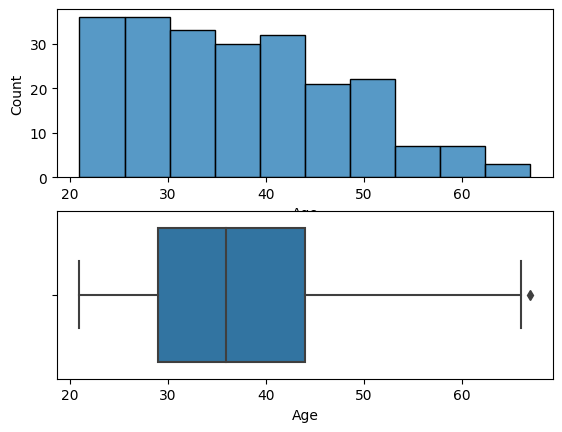

In [ ]:
fig, axes = plt.subplots(2,1)

sns.histplot(diab, x = 'Age', ax = axes[0])
sns.boxplot(diab, x = 'Age' ,ax = axes[1])

print("Skewness is: ", diab['Age'].skew())
print("Kurtosis is: ", diab['Age'].kurt())


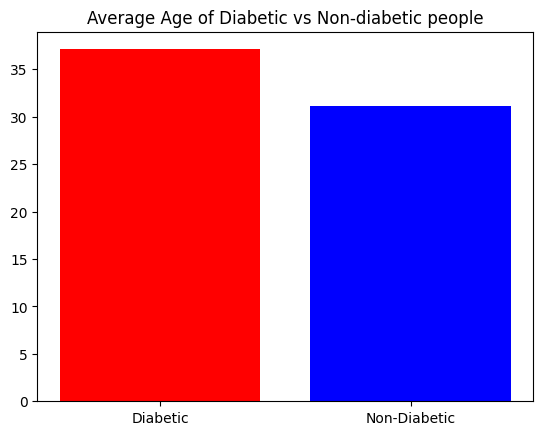

In [ ]:
a = np.average(diab['Age'])
b = np.average(nodiab['Age'])

x = [a,b]
y = ['Diabetic', 'Non-Diabetic']

plt.bar(y,x, color = ['Red', 'Blue'])
plt.title("Average Age of Diabetic vs Non-diabetic people")
plt.show()

The above graph explain the comparison of Age between diabetic and non diabetic people. More aged people tend to be more diabetic on an average

### **Insulin Levels**

Skewness is:  0.8398145585378054
Kurtosis is:  -0.35425311735688236


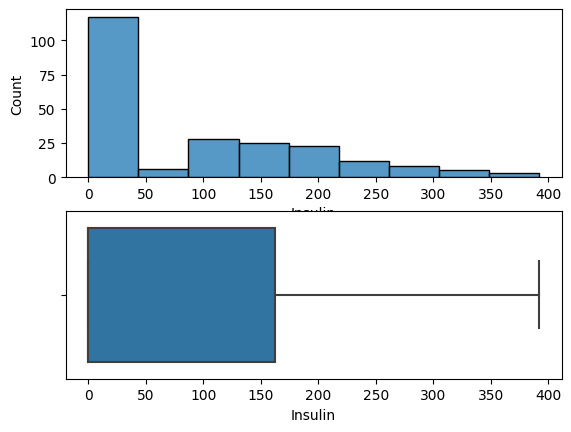

In [ ]:
fig, axes = plt.subplots(2,1)

sns.histplot(diab, x = 'Insulin', ax = axes[0])
sns.boxplot(diab, x = 'Insulin' ,ax = axes[1])

print("Skewness is: ", diab['Insulin'].skew())
print("Kurtosis is: ", diab['Insulin'].kurt())

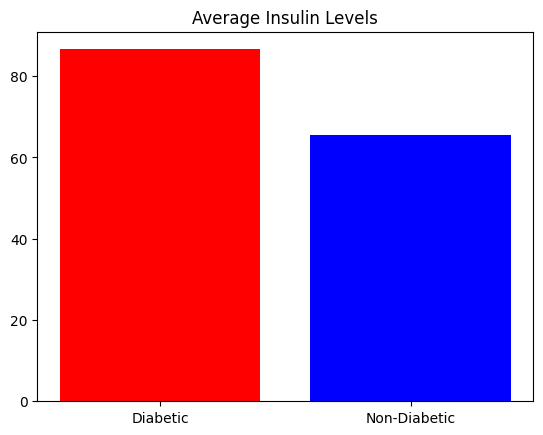

In [ ]:
a = np.average(diab['Insulin'])
b = np.average(nodiab['Insulin'])

x = [a,b]
y = ['Diabetic', 'Non-Diabetic']

plt.bar(y,x, color = ['Red', 'Blue'])
plt.title("Average Insulin Levels")
plt.show()

The above graph explain the comparison of Insulin Levels between diabetic and non diabetic people

## **Glucose**

Skewness is:  0.13846575326520927
Kurtosis is:  -0.9479866612790824


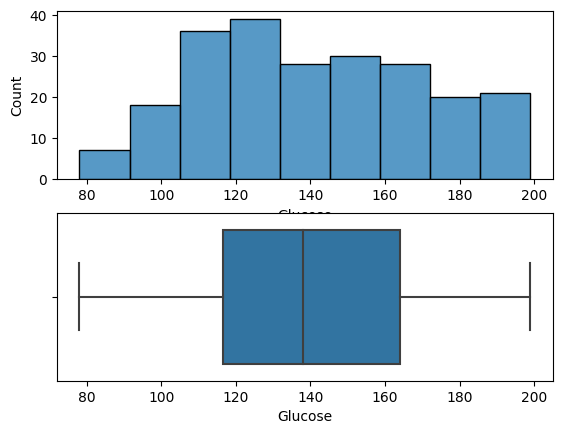

In [ ]:
fig, axes = plt.subplots(2,1)

sns.histplot(diab, x = 'Glucose', ax = axes[0])
sns.boxplot(diab, x = 'Glucose' ,ax = axes[1])

print("Skewness is: ", diab['Glucose'].skew())
print("Kurtosis is: ", diab['Glucose'].kurt())

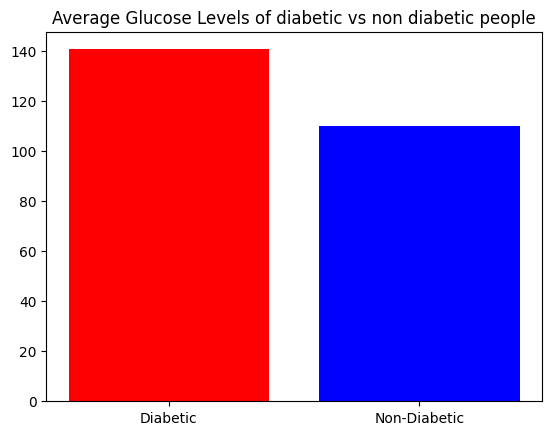

In [ ]:
a = np.average(diab['Glucose'])
b = np.average(nodiab['Glucose'])

x = [a,b]
y = ['Diabetic', 'Non-Diabetic']

plt.bar(y,x, color = ['Red', 'Blue'])
plt.title("Average Glucose Levels of diabetic vs non diabetic people")
plt.show()

The above graph explain the comparison of Glucose levels between diabetic and non diabetic people. Glucose levels and Diabetes have direct correlation

## **BMI**

Skewness is:  0.6612687791190888
Kurtosis is:  0.3403270251703794


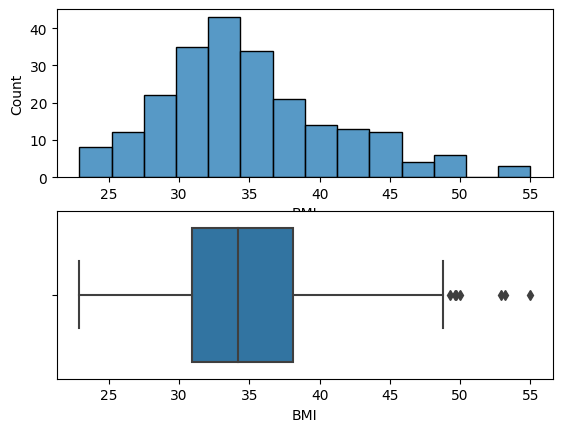

In [ ]:
fig, axes = plt.subplots(2,1)

sns.histplot(diab, x = 'BMI', ax = axes[0])
sns.boxplot(diab, x = 'BMI' ,ax = axes[1])


print("Skewness is: ", diab['BMI'].skew())
print("Kurtosis is: ", diab['BMI'].kurt())


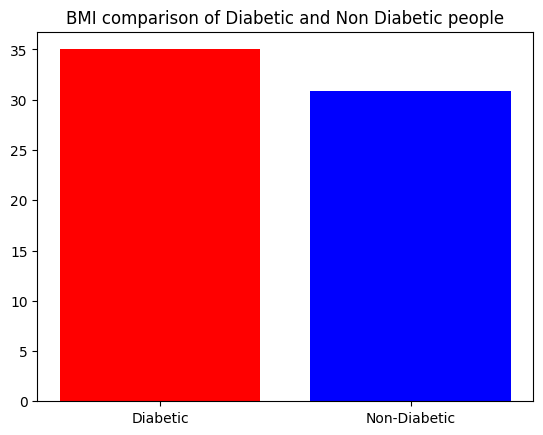

In [ ]:
a = np.average(diab['BMI'])
b = np.average(nodiab['BMI'])

x = [a,b]
y = ['Diabetic', 'Non-Diabetic']

plt.bar(y,x, color = ['Red', 'Blue'])
plt.title("BMI comparison of Diabetic and Non Diabetic people")
plt.show()

The above graph explain the comparison of BMI between diabetic and  non diabetic people. Diabetic people tend to have higher BMI

## **Diabetes Pedigree Function**

Skewness is:  0.87506315685662
Kurtosis is:  -0.02190372685208475


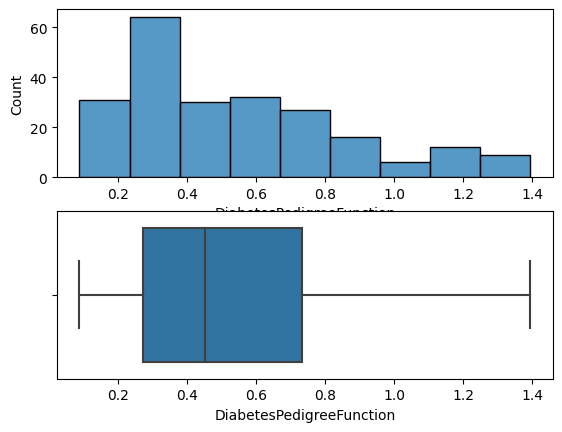

In [ ]:
fig, axes = plt.subplots(2,1)

sns.histplot(diab, x = 'DiabetesPedigreeFunction', ax = axes[0])
sns.boxplot(diab, x = 'DiabetesPedigreeFunction' ,ax = axes[1])


print("Skewness is: ", diab['DiabetesPedigreeFunction'].skew())
print("Kurtosis is: ", diab['DiabetesPedigreeFunction'].kurt())

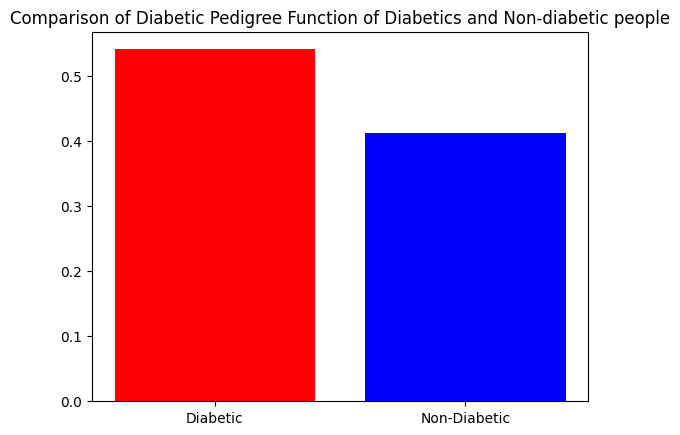

In [ ]:
a = np.average(diab['DiabetesPedigreeFunction'])
b = np.average(nodiab['DiabetesPedigreeFunction'])

x = [a,b]
y = ['Diabetic', 'Non-Diabetic']

plt.bar(y,x, color = ['Red', 'Blue'])
plt.title("Comparison of Diabetic Pedigree Function of Diabetics and Non-diabetic people")
plt.show()

The above graph explain the comparison of Diabetic Pedrigree Function between diabetic and  non diabetic people

## **Blood Pressure**

Skewness is:  0.07090814995338507
Kurtosis is:  1.0635449793411649


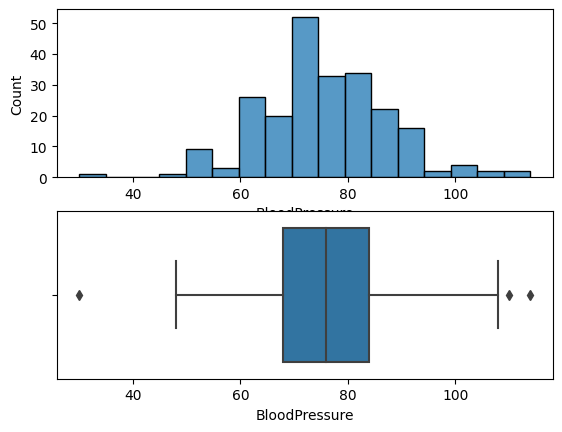

In [ ]:
fig, axes = plt.subplots(2,1)

sns.histplot(diab, x = 'BloodPressure', ax = axes[0])
sns.boxplot(diab, x = 'BloodPressure' ,ax = axes[1])


print("Skewness is: ", diab['BloodPressure'].skew())
print("Kurtosis is: ", diab['BloodPressure'].kurt())

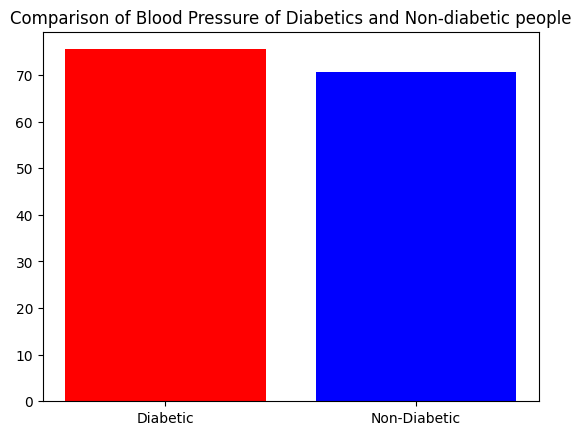

In [ ]:
a = np.average(diab['BloodPressure'])
b = np.average(nodiab['BloodPressure'])

x = [a,b]
y = ['Diabetic', 'Non-Diabetic']

plt.bar(y,x, color = ['Red', 'Blue'])
plt.title("Comparison of Blood Pressure of Diabetics and Non-diabetic people")
plt.show()

The above graph explain the comparison of Blood Pressure between diabetic and  non diabetic people

## **Skin Thickness**

Skewness is:  -0.24114346081418492
Kurtosis is:  -1.4008025252490741


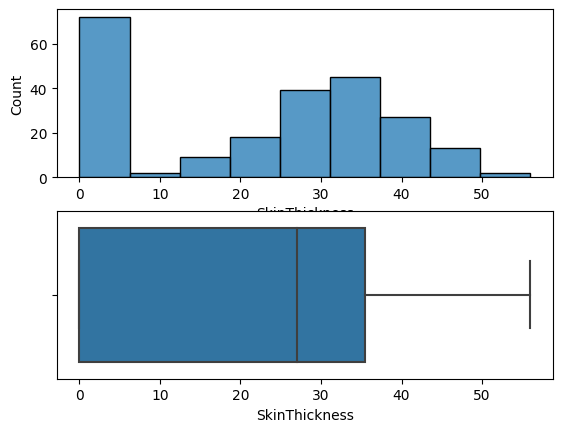

In [ ]:
fig, axes = plt.subplots(2,1)

sns.histplot(diab, x = 'SkinThickness', ax = axes[0])
sns.boxplot(diab, x = 'SkinThickness' ,ax = axes[1])


print("Skewness is: ", diab['SkinThickness'].skew())
print("Kurtosis is: ", diab['SkinThickness'].kurt())

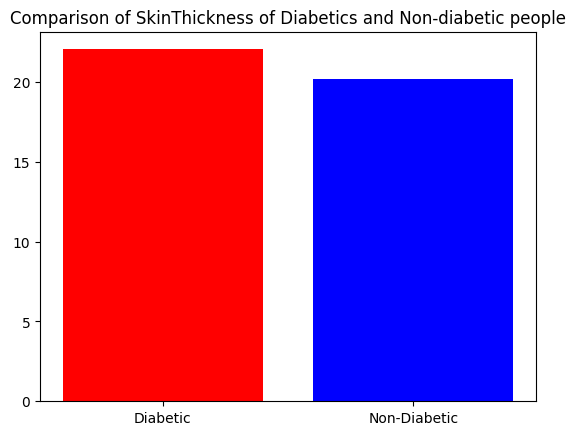

In [ ]:

a = np.average(diab['SkinThickness'])
b = np.average(nodiab['SkinThickness'])

x = [a,b]
y = ['Diabetic', 'Non-Diabetic']

plt.bar(y,x, color = ['Red', 'Blue'])
plt.title("Comparison of SkinThickness of Diabetics and Non-diabetic people")
plt.show()

The above graph explain the comparison of skin thickness between diabetic and non diabetic people. On an average, Diabetic people have higher skin thickness as comapred to non diabetic people.




## **Pregnancies**

Skewness is:  0.30627513031815945
Kurtosis is:  -0.8627143104677768


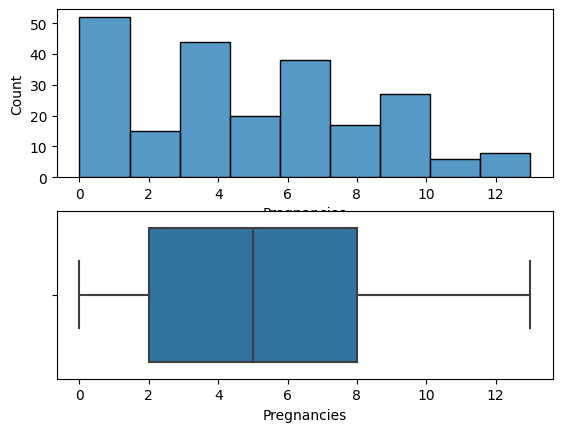

In [ ]:
#Scatterplot and Boxplot analysis of Pregnancy feature
fig, axes = plt.subplots(2,1)

sns.histplot(diab, x = 'Pregnancies', ax = axes[0])
sns.boxplot(diab, x = 'Pregnancies' ,ax = axes[1])


print("Skewness is: ", diab['Pregnancies'].skew())
print("Kurtosis is: ", diab['Pregnancies'].kurt())

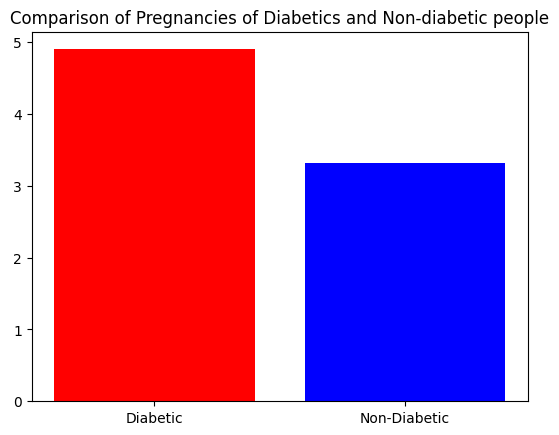

In [ ]:
a = np.average(diab['Pregnancies'])
b = np.average(nodiab['Pregnancies'])

x = [a,b]
y = ['Diabetic', 'Non-Diabetic']

plt.bar(y,x, color = ['Red', 'Blue'])
plt.title("Comparison of Pregnancies of Diabetics and Non-diabetic people")
plt.show()

Above comparison shows a direct correlation between Diabetes and Pregnancies. Women who get pregnant frequently are more prone to diabetes.

## **Bivariate Analysis**

<Axes: >

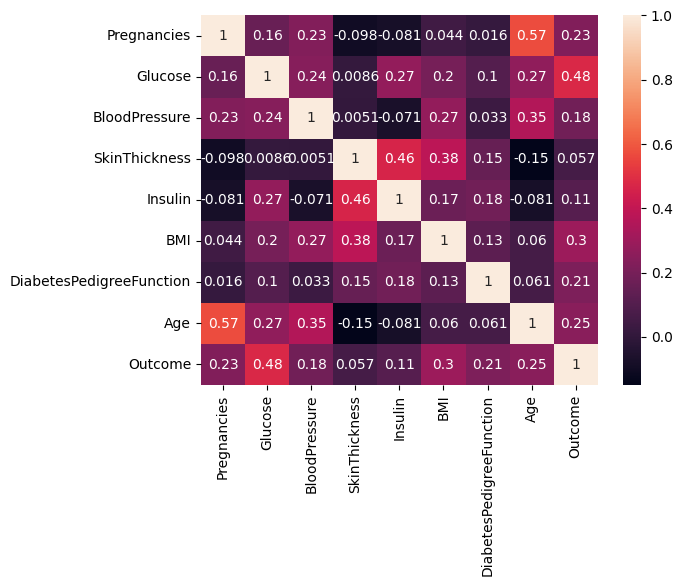

In [ ]:
#Analysing Correlation Heatmap
corr = df.corr()
sns.heatmap(corr, annot = True)

We can clearly see, there is significant correlation between the features Age and Pregnancies. We will do the analysis accordingly for the sake of improving models performance.

Text(0.5, 1.0, 'Bivariate Relationship between Age and Pregnancies')

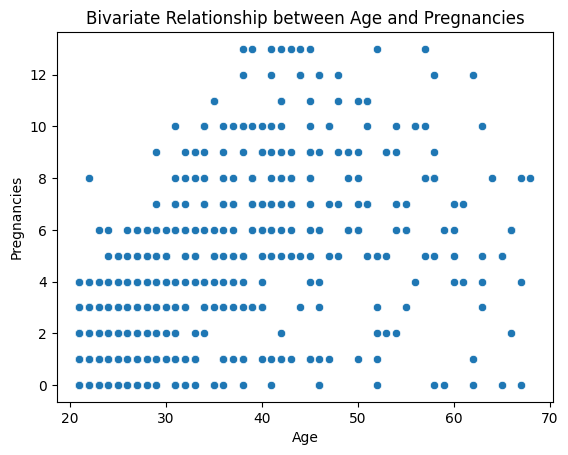

In [ ]:
#Bivariate Analysis of the features Age and Pregnancies
sns.scatterplot(df, x = 'Age', y= 'Pregnancies')
plt.title("Bivariate Relationship between Age and Pregnancies")

Moderately Correlated, correaltion coefficient is > 0.5


<Axes: xlabel='Insulin', ylabel='SkinThickness'>

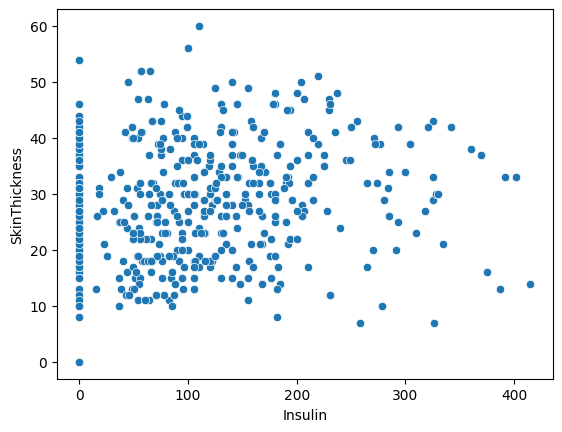

In [ ]:
#Bivariate analysis between Insulin and Skin Thickness
sns.scatterplot(df, x = 'Insulin', y= 'SkinThickness')
plt.title("Bivariate Relationship between Insulin  and Skin Thickness")

Not as much as correlated as the age-pregnancy relationship, correlation coefficient around 0.4


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


## **CONCLUSIONS FROM EDA**

1. Major factors that tell if a person is diabetic or not are: Age, Pregnancy, BMI, Diabetes Pedigree Fucntion, Blood Glucose levels, Insulin levels and Blood pressure to some extent.

2. Age and Pregnancy features are moderately correlated.
3. Blood Glucose levels and the Outcome features are correlated to some extent.

## **Implementation of Machine Learning Model**

In [ ]:
#Seperating the Target variable
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

from sklearn.linear_model import LogisticRegression

#Fitting the model
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

pred = logReg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Model performance score
score = logReg.score(X_test, y_test)
print(score)

0.7898550724637681


In [ ]:
from sklearn import metrics
#Confusion matrix evaluation
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[85 12]
 [17 24]]


Text(0.5, 1.0, 'Confusion Matrix Heatmap(when Age column is not Dropped)')

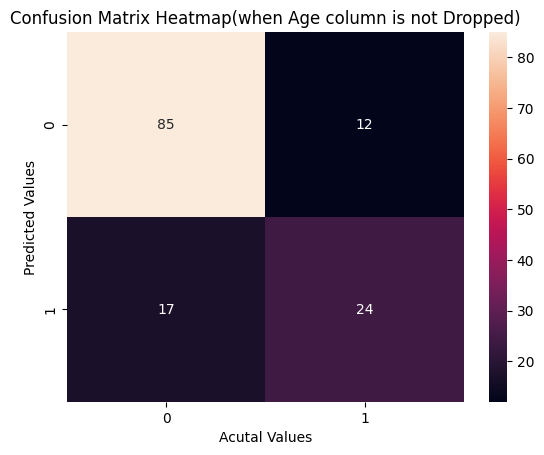

In [ ]:
#Heatmap
sns.heatmap(cm, annot = True)
plt.xlabel('Acutal Values')
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix Heatmap(when Age column is not Dropped)")

### **If We Drop the age column**

Lets see If we dropping the age column from the dataset will increase the accuracy or not. We are doing this because of correlation matrix above. Correlated features usually affect models accuracy and perfromace, that's we shall check if drooping the age(or pregnancy) column would help or not.

In [ ]:
df1 = df.drop(['Age'], axis = 1)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
5,5,116,74,0,0,25.6,0.201,0


In [ ]:
#seperating target variable and splitting test-tain data(80-20)
X1 = df1.drop(['Outcome'], axis = 1)
y1 = df1['Outcome']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 15)


In [ ]:
#Fitting the model
logReg.fit(X1_train, y1_train)
pred1 = logReg.predict(X1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Model accuracy  score
score = logReg.score(X1_test, y1_test)
print(score)

0.782608695652174


In [ ]:
#Confusion matrix analysis
cm1= metrics.confusion_matrix(y1_test, pred1)
print(cm1)

[[86 11]
 [19 22]]


Text(0.5, 1.0, 'Confusion matrix heatmap(when Age column is dropped)')

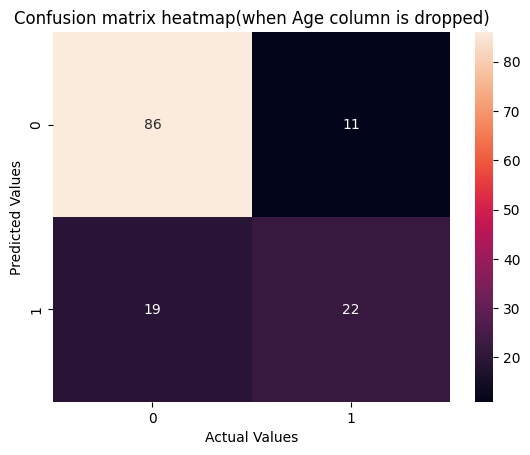

In [ ]:
#Heatmap
sns.heatmap(cm1, annot = True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Confusion matrix heatmap(when Age column is dropped)")

From the Above two models, we can clerly see, If we dont drop the Age column, the score is more accurate as compared to whem we drop the age  column. So the First model is more accurate
